Primero corremos un script para el build de las librerias de c++ como modulos de python.

In [ ]:
!sh build.sh

Importamos librerias necesarias

In [1]:
import metnum
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
import time
from pathlib import Path
from utils import get_MNIST
import matplotlib.pyplot as plt

Obtenemos el dataset de mnist, partido en 4/5 de entrenamiento y 1/5 de validacion. El mismo esta shuffleado sobre si mismo.

In [4]:
X_train, y_train, X_val, y_val = get_MNIST(items=10000)

Elegimos la cantidad de k's a testear. En este caso, haremos del 1 al 130

In [24]:
rango_k = 130

Ejecutamos el loop con cada uno de los k en el rango entre 1 y rango_k. Luego, guardamos los resultados en 
accuracies

In [25]:
accuracies = []
for k in range(rango_k):
    clf_metnum = metnum.KNNClassifier(k)
    clf_metnum.fit(X_train, y_train)
    clf_mentum_predicted = clf_metnum.predict(X_val)
    accuracies.append(accuracy_score(clf_mentum_predicted, y_val))

In [ ]:
for i in range(len(accuracies)):
    print("k =", i+1, ":", "accuracy =", accuracies[i])

Por último, graficamos los resultados demostrando la accuracy del predict en funcion del k dado para kNN

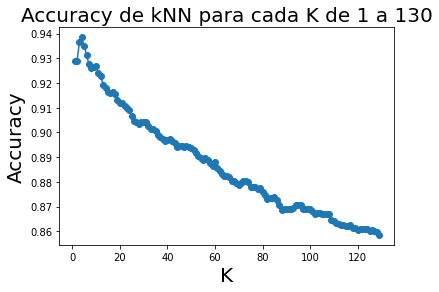

In [33]:
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=10)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('figure', titlesize=10)  # fontsize of the figure title

plt.plot(range(1, rango_k), accuracies[1:], '-o')
plt.xlabel('K', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('Accuracy de kNN para cada K de 1 a 130', fontsize=20)
plt.show()